## Lib

In [36]:
!pip install -q -r requirements.txt
import os
import sys
# Add the classes directory to the system path
classes_path = os.path.abspath(os.path.join(os.getcwd(), '../classes'))
if classes_path not in sys.path:
    sys.path.insert(0, classes_path)
import class_SeriesAnalyser
import class_Trader
import class_DataProcessor
import class_ForecastingTrader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import matplotlib.cm as cm
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import OPTICS
%load_ext autoreload
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
series_analyser = class_SeriesAnalyser.SeriesAnalyser()
trader = class_Trader.Trader()
data_processor = class_DataProcessor.DataProcessor()

In [3]:
# Convert Google Drive share link to direct download link
file_id = "1EX0iAcHvV5yAo3cDpSS_GtehIhHuKTyk"
etf_data_with_indicators = f"https://drive.google.com/uc?export=download&id={file_id}"
index_dict = pd.read_pickle(etf_data_with_indicators)
index_dict

{'ARKK':                             adjClose    adjHigh     adjLow    adjOpen  \
 date                                                                    
 2018-01-02 00:00:00+00:00  36.133634  36.143000  34.885160  34.972263   
 2018-01-03 00:00:00+00:00  36.283489  36.576641  36.274123  36.480173   
 2018-01-04 00:00:00+00:00  36.405245  36.704954  36.039975  36.620661   
 2018-01-05 00:00:00+00:00  36.995297  36.995297  36.592563  36.770515   
 2018-01-08 00:00:00+00:00  36.742418  36.742418  35.890121  36.536368   
 ...                              ...        ...        ...        ...   
 2025-04-16 00:00:00+00:00  45.080000  45.870000  44.055000  45.500000   
 2025-04-17 00:00:00+00:00  45.120000  45.540000  44.555000  45.200000   
 2025-04-21 00:00:00+00:00  44.440000  44.760000  43.680000  44.300000   
 2025-04-22 00:00:00+00:00  46.120000  46.730000  44.980000  44.980000   
 2025-04-23 00:00:00+00:00  47.950000  49.500300  47.830000  48.470000   
 
                            

In [4]:
data = pd.DataFrame({
    ticker: df['adjClose']
    for ticker, df in index_dict.items()
})
data.index = data.index.tz_localize(None)
data.dropna(inplace=True)
data.to_excel(f'etf_close_prices.xlsx', index=True)
data

,ARKK,ARKQ,ARKW,CIBR,CQQQ,CWEB,FDN,FTC,FTEC,FTXL,...,TLTE,TQQQ,USD,VGT,VV,XLK,XNTK,XSD,XSW,XT
date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,36.133634,32.247813,41.379598,22.503973,61.906008,509.985282,111.07,59.363983,47.459949,29.450725,...,48.077599,11.655315,5.208040,156.413246,109.756618,60.083412,62.744553,69.745467,68.536574,33.627027
2018-01-03,36.283489,32.711363,41.806371,22.696397,62.279113,515.860900,112.64,60.087699,47.984472,30.007875,...,48.369600,11.996567,5.338779,158.043136,110.458762,60.584571,63.616921,70.800603,69.117810,33.898590
2018-01-04,36.405245,32.830835,41.797662,22.811852,62.868226,527.153103,112.92,60.328938,48.256100,30.287404,...,48.424844,12.066895,5.354208,158.951753,110.920933,60.890835,63.800192,71.303971,70.024144,34.029689
2018-01-05,36.995297,33.241818,42.398628,22.840715,63.329699,546.359030,114.01,60.792116,48.724424,30.452450,...,48.661601,12.431324,5.394404,160.647214,111.631964,61.531205,64.547936,71.536295,70.162064,34.310617
2018-01-08,36.742418,33.652801,42.546693,23.023518,63.712622,559.560809,114.78,61.129850,48.996052,30.528772,...,48.764196,12.569583,5.498345,161.415323,111.880825,61.763223,65.024440,72.165504,70.831963,34.348074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-16,45.080000,64.610000,91.230000,62.230000,39.850000,31.460000,212.67,125.890000,151.100000,67.490000,...,50.136300,45.290000,34.310000,507.750000,241.860000,193.910000,177.894400,172.930000,150.445700,54.200000
2025-04-17,45.120000,64.690000,91.480000,61.770000,39.950000,31.490000,211.93,126.390000,150.250000,67.240000,...,50.531400,45.160000,32.780000,505.530000,242.470000,192.860000,177.864000,172.800000,150.401800,54.370000
2025-04-21,44.440000,62.580000,89.720000,60.220000,40.260000,31.590000,206.33,122.790000,146.280000,66.070000,...,50.432200,41.860000,30.590000,491.750000,236.430000,187.880000,173.882800,169.650000,145.967200,53.600000


In [5]:
df_prices = pd.read_excel(f'etf_close_prices.xlsx', index_col=0)
df_prices

,ARKK,ARKQ,ARKW,CIBR,CQQQ,CWEB,FDN,FTC,FTEC,FTXL,...,TLTE,TQQQ,USD,VGT,VV,XLK,XNTK,XSD,XSW,XT
date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,36.133634,32.247813,41.379598,22.503973,61.906008,509.985282,111.07,59.363983,47.459949,29.450725,...,48.077599,11.655315,5.208040,156.413246,109.756618,60.083412,62.744553,69.745467,68.536574,33.627027
2018-01-03,36.283489,32.711363,41.806371,22.696397,62.279113,515.860900,112.64,60.087699,47.984472,30.007875,...,48.369600,11.996567,5.338779,158.043136,110.458762,60.584571,63.616921,70.800603,69.117810,33.898590
2018-01-04,36.405245,32.830835,41.797662,22.811852,62.868226,527.153103,112.92,60.328938,48.256100,30.287404,...,48.424844,12.066895,5.354208,158.951753,110.920933,60.890835,63.800192,71.303971,70.024144,34.029689
2018-01-05,36.995297,33.241818,42.398628,22.840715,63.329699,546.359030,114.01,60.792116,48.724424,30.452450,...,48.661601,12.431324,5.394404,160.647214,111.631964,61.531205,64.547936,71.536295,70.162064,34.310617
2018-01-08,36.742418,33.652801,42.546693,23.023518,63.712622,559.560809,114.78,61.129850,48.996052,30.528772,...,48.764196,12.569583,5.498345,161.415323,111.880825,61.763223,65.024440,72.165504,70.831963,34.348074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-16,45.080000,64.610000,91.230000,62.230000,39.850000,31.460000,212.67,125.890000,151.100000,67.490000,...,50.136300,45.290000,34.310000,507.750000,241.860000,193.910000,177.894400,172.930000,150.445700,54.200000
2025-04-17,45.120000,64.690000,91.480000,61.770000,39.950000,31.490000,211.93,126.390000,150.250000,67.240000,...,50.531400,45.160000,32.780000,505.530000,242.470000,192.860000,177.864000,172.800000,150.401800,54.370000
2025-04-21,44.440000,62.580000,89.720000,60.220000,40.260000,31.590000,206.33,122.790000,146.280000,66.070000,...,50.432200,41.860000,30.590000,491.750000,236.430000,187.880000,173.882800,169.650000,145.967200,53.600000


In [6]:
df_prices = df_prices.dropna(axis=0, how='any')
df_prices

,ARKK,ARKQ,ARKW,CIBR,CQQQ,CWEB,FDN,FTC,FTEC,FTXL,...,TLTE,TQQQ,USD,VGT,VV,XLK,XNTK,XSD,XSW,XT
date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,36.133634,32.247813,41.379598,22.503973,61.906008,509.985282,111.07,59.363983,47.459949,29.450725,...,48.077599,11.655315,5.208040,156.413246,109.756618,60.083412,62.744553,69.745467,68.536574,33.627027
2018-01-03,36.283489,32.711363,41.806371,22.696397,62.279113,515.860900,112.64,60.087699,47.984472,30.007875,...,48.369600,11.996567,5.338779,158.043136,110.458762,60.584571,63.616921,70.800603,69.117810,33.898590
2018-01-04,36.405245,32.830835,41.797662,22.811852,62.868226,527.153103,112.92,60.328938,48.256100,30.287404,...,48.424844,12.066895,5.354208,158.951753,110.920933,60.890835,63.800192,71.303971,70.024144,34.029689
2018-01-05,36.995297,33.241818,42.398628,22.840715,63.329699,546.359030,114.01,60.792116,48.724424,30.452450,...,48.661601,12.431324,5.394404,160.647214,111.631964,61.531205,64.547936,71.536295,70.162064,34.310617
2018-01-08,36.742418,33.652801,42.546693,23.023518,63.712622,559.560809,114.78,61.129850,48.996052,30.528772,...,48.764196,12.569583,5.498345,161.415323,111.880825,61.763223,65.024440,72.165504,70.831963,34.348074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-16,45.080000,64.610000,91.230000,62.230000,39.850000,31.460000,212.67,125.890000,151.100000,67.490000,...,50.136300,45.290000,34.310000,507.750000,241.860000,193.910000,177.894400,172.930000,150.445700,54.200000
2025-04-17,45.120000,64.690000,91.480000,61.770000,39.950000,31.490000,211.93,126.390000,150.250000,67.240000,...,50.531400,45.160000,32.780000,505.530000,242.470000,192.860000,177.864000,172.800000,150.401800,54.370000
2025-04-21,44.440000,62.580000,89.720000,60.220000,40.260000,31.590000,206.33,122.790000,146.280000,66.070000,...,50.432200,41.860000,30.590000,491.750000,236.430000,187.880000,173.882800,169.650000,145.967200,53.600000


In [7]:
# split data in training and test
df_prices_train, df_prices_test = data_processor.split_data(df_prices,
                                                            ('01-01-2018',
                                                             '31-12-2023'),
                                                            ('01-01-2024',
                                                             '31-12-2024'),
                                                            remove_nan=True)
train_val_split = '01-01-2023'

Total of 66 tickers
Total of 66 tickers after removing tickers with Nan values


In [8]:
df_prices_train

,ARKK,ARKQ,ARKW,CIBR,CQQQ,CWEB,FDN,FTC,FTEC,FTXL,...,TLTE,TQQQ,USD,VGT,VV,XLK,XNTK,XSD,XSW,XT
date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,36.133634,32.247813,41.379598,22.503973,61.906008,509.985282,111.07,59.363983,47.459949,29.450725,...,48.077599,11.655315,5.208040,156.413246,109.756618,60.083412,62.744553,69.745467,68.536574,33.627027
2018-01-03,36.283489,32.711363,41.806371,22.696397,62.279113,515.860900,112.64,60.087699,47.984472,30.007875,...,48.369600,11.996567,5.338779,158.043136,110.458762,60.584571,63.616921,70.800603,69.117810,33.898590
2018-01-04,36.405245,32.830835,41.797662,22.811852,62.868226,527.153103,112.92,60.328938,48.256100,30.287404,...,48.424844,12.066895,5.354208,158.951753,110.920933,60.890835,63.800192,71.303971,70.024144,34.029689
2018-01-05,36.995297,33.241818,42.398628,22.840715,63.329699,546.359030,114.01,60.792116,48.724424,30.452450,...,48.661601,12.431324,5.394404,160.647214,111.631964,61.531205,64.547936,71.536295,70.162064,34.310617
2018-01-08,36.742418,33.652801,42.546693,23.023518,63.712622,559.560809,114.78,61.129850,48.996052,30.528772,...,48.764196,12.569583,5.498345,161.415323,111.880825,61.763223,65.024440,72.165504,70.831963,34.348074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,53.010000,57.840000,76.470000,53.853912,34.535629,29.166545,187.70,109.049714,142.581283,80.500185,...,48.233572,49.509907,26.570021,479.861759,214.199607,190.410512,162.694938,224.973598,151.698506,59.087093
2023-12-26,53.790000,58.820000,77.200000,54.123082,34.505711,29.539984,188.13,109.528002,143.256741,82.081545,...,48.359051,50.414557,27.358390,482.233235,215.114443,191.203683,164.063642,228.612819,152.992223,59.633552
2023-12-27,54.260000,58.840000,78.290000,53.993481,34.405983,29.501683,188.10,109.647574,143.346140,82.151165,...,48.785930,50.680052,27.428245,482.699592,215.458736,191.193768,164.445474,228.383498,153.602077,59.802457


## Clustering using PCA on returns

In [9]:
df_returns = data_processor.get_return_series(df_prices_train)
df_returns

,ARKK,ARKQ,ARKW,CIBR,CQQQ,CWEB,FDN,FTC,FTEC,FTXL,...,TLTE,TQQQ,USD,VGT,VV,XLK,XNTK,XSD,XSW,XT
date,,,,,,,,,,,,,,,,,,,,,
2018-01-03,0.004147,0.014375,0.010314,0.008551,0.006027,0.011521,0.014135,0.012191,0.011052,0.018918,...,0.006074,0.029279,0.025103,0.010420,0.006397,0.008341,0.013903,0.015128,0.008481,0.008076
2018-01-04,0.003356,0.003652,-0.000208,0.005087,0.009459,0.021890,0.002486,0.004015,0.005661,0.009315,...,0.001142,0.005862,0.002890,0.005749,0.004184,0.005055,0.002881,0.007110,0.013113,0.003867
2018-01-05,0.016208,0.012518,0.014378,0.001265,0.007340,0.036433,0.009653,0.007678,0.009705,0.005449,...,0.004889,0.030201,0.007507,0.010667,0.006410,0.010517,0.011720,0.003258,0.001970,0.008255
2018-01-08,-0.006835,0.012363,0.003492,0.008003,0.006047,0.024163,0.006754,0.005556,0.005575,0.002506,...,0.002108,0.011122,0.019268,0.004781,0.002229,0.003771,0.007382,0.008796,0.009548,0.001092
2018-01-09,0.002039,0.002556,-0.002661,-0.003343,0.004161,0.000328,-0.002527,0.003631,-0.003059,-0.011562,...,-0.006312,0.000763,-0.024590,-0.002553,0.002304,-0.002554,-0.004622,-0.012072,-0.000556,0.002181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,0.013382,0.006438,0.008440,0.004185,-0.032141,-0.082254,0.000426,0.005951,0.001535,0.005527,...,-0.001685,0.004088,0.002259,0.000973,0.002209,0.001303,0.000279,0.005526,0.010002,0.004561
2023-12-26,0.014714,0.016943,0.009546,0.004998,-0.000866,0.012804,0.002291,0.004386,0.004737,0.019644,...,0.002601,0.018272,0.029671,0.004942,0.004271,0.004166,0.008413,0.016176,0.008528,0.009248
2023-12-27,0.008738,0.000340,0.014119,-0.002395,-0.002890,-0.001297,-0.000159,0.001092,0.000624,0.000848,...,0.008827,0.005266,0.002553,0.000967,0.001601,-0.000052,0.002327,-0.001003,0.003986,0.002832


In [10]:
print('Total number of possible pairs: ', len(df_returns.columns)*(len(df_returns.columns)-1)/2)

Total number of possible pairs:  2145.0


### Applying PCA on Returns

In [11]:
N_PRIN_COMPONENTS = 5
X, explained_variance = series_analyser.apply_PCA(N_PRIN_COMPONENTS, df_returns, 
                                                  random_state=0)#12)
print(explained_variance)

[0.03245828 0.00377991 0.00146    0.00073364 0.00060063]


### Clustering

In [12]:
def cluster_size(counts):
    plt.figure()
    plt.barh(counts.index+1, counts.values)
    #plt.title('Cluster Member Counts')
    plt.yticks(np.arange(1, len(counts)+1, 1))
    plt.xlabel('ETFs within cluster', size=12)
    plt.ylabel('Cluster Id', size=12);

In [13]:
clustered_series_all, clustered_series, counts, clf = series_analyser.apply_DBSCAN(0.15,
                                                                                   3,
                                                                                   X,
                                                                                   df_returns)

Clusters discovered: 0
Pairs to evaluate: 0


In [14]:
# optics
clustered_series_all, clustered_series, counts, clf = series_analyser.apply_OPTICS(X, df_returns, min_samples=3,
                                                                                   #max_eps=5, 
                                                                                   cluster_method='xi')

OPTICS(max_eps=2, metric='euclidean', min_samples=3)
Clusters discovered: 5
Pairs to evaluate: 89


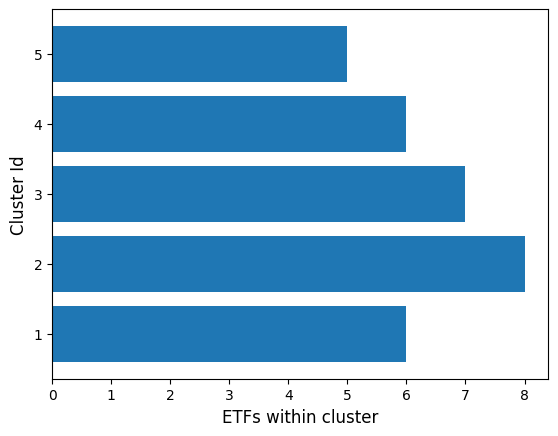

In [15]:
cluster_size(counts)

In [16]:
print(counts)
print('Average cluster size: ', np.mean(counts))

1    8
2    7
0    6
3    6
4    5
Name: count, dtype: int64
Average cluster size:  6.4


**Fundamental analysis for clusters**

In [17]:
etfs, etfs_unique, tickers = \
            data_processor.read_ticker_excel('../../data/tech_etfs.xlsx',)

In [18]:
for label_n in range(len(counts)):
    elements_cluster_n = list(clustered_series[clustered_series == label_n].index)
    etfs_cluster_n = etfs_unique[etfs_unique['Ticker'].isin(elements_cluster_n)]
    print('\nCluster {}:\n{}'.format(label_n, etfs_cluster_n[['Ticker', 'Segment']]))


Cluster 0:
   Ticker     Segment
3    CIBR  Technology
6     FDN  Technology
15   HACK  Technology
21    IGV  Technology
37   PNQI      Growth
50   SKYY  Technology

Cluster 1:
   Ticker            Segment
7     FTC          Large Cap
30   MTUM          Large Cap
31   NULG          Large Cap
34   ONEQ          Large Cap
42   QQEW          Large Cap
44   QQQE          Large Cap
45   QQXT          Large Cap
71     XT  Developed Markets

Cluster 2:
   Ticker            Segment
8    FTEC         Technology
20    IGM         Technology
26    IXN         Technology
27    IYW         Technology
43    QQQ          Large Cap
64    VGT  Developed Markets
67    XLK         Technology

Cluster 3:
   Ticker            Segment
16   IDLV  Developed Markets
19   IEFA  Developed Markets
35    PIN   Emerging Markets
36    PIZ  Developed Markets
60   TLTD  Developed Markets
61   TLTE   Emerging Markets

Cluster 4:
   Ticker     Segment
9    FTXL         NaN
40    PSI  Technology
51    SMH  Technology
55

### Visualizing with t-sne

In [19]:
def plot_TSNE(X, clf, clustered_series_all):
    """
    This function makes use of t-sne to visualize clusters in 2d.
    """
    
    X_tsne = TSNE(learning_rate=1000, perplexity=25, random_state=1337).fit_transform(X)
    
    # visualization
    fig = plt.figure(1, facecolor='white', figsize=(15,15), frameon=True, edgecolor='black')
    plt.clf()
    
    # axis in the middle
    ax = fig.add_subplot(1, 1, 1, alpha=0.9)
    # Move left y-axis and bottim x-axis to centre, passing through (0,0)
    ax.spines['left'].set_position('center')
    ax.spines['left'].set_alpha(0.3)
    ax.spines['bottom'].set_position('center')
    ax.spines['bottom'].set_alpha(0.3)
    # Eliminate upper and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    # Show ticks in the left and lower axes only
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.tick_params(which='major', labelsize=18)
    #plt.axis('off')

    # etfs in cluster
    labels = clf.labels_
    x = X_tsne[(labels!=-1), 0]
    y = X_tsne[(labels!=-1), 1]
    tickers = list(clustered_series_all[clustered_series_all != -1].index)
    plt.scatter(
        x,
        y,
        s=300,
        alpha=0.75,
        c=labels[labels!=-1],
        cmap=cm.Paired
    )
    for i, ticker in enumerate(tickers):
        plt.annotate(ticker, (x[i]-20, y[i]+12), size=15)

    # remaining etfs, not clustered
    x = X_tsne[(clustered_series_all==-1).values, 0]
    y = X_tsne[(clustered_series_all==-1).values, 1]
    tickers = list(clustered_series_all[clustered_series_all == -1].index)

    # WARNING: elimintate outliers
    outliers = pd.read_csv('../../data/low_liquidity_outliers.csv')
    outlier = outliers.iloc[:, 0].tolist() 
    to_remove_x = []
    to_remove_y = []
    idx = clustered_series_all.index
    for ticker in outliers:
        if ticker in idx:
            loc = idx.get_loc(ticker)
            to_remove_x.append(x[loc])
            to_remove_y.append(y[loc])
    x = np.array([i for i in x if i not in to_remove_x])
    y = np.array([i for i in y if i not in to_remove_y])
    x = np.array([i for i in x if i not in to_remove_x])
    y= np.array([i for i in y if i not in to_remove_y])

    plt.scatter(
        x,
        y,
        s=150,
        alpha=0.20,
        c='black'
    )
    #for i, ticker in enumerate(tickers):
    #    plt.annotate(ticker, (x[i]+20, y[i]+20))#, arrowprops={'arrowstyle':'simple'})
        
    #plt.title('OPTICS clusters visualized with t-SNE', size=16);
    plt.xlabel('t-SNE Dim. 1', position=(0.92,0), size=20)
    plt.ylabel('t-SNE Dim. 2', position=(0,0.92), size=20)
    ax.set_xticks(range(-300, 301, 600))
    ax.set_yticks(range(-300, 301, 600))
    #plt.savefig('DBSCAN_2014_2018_eps0_15.png', bbox_inches='tight', pad_inches=0.01)
    plt.savefig('OPTICS_2013_2017.png', bbox_inches='tight', pad_inches=0.1)
    plt.show()
    # include connections - see quontopian

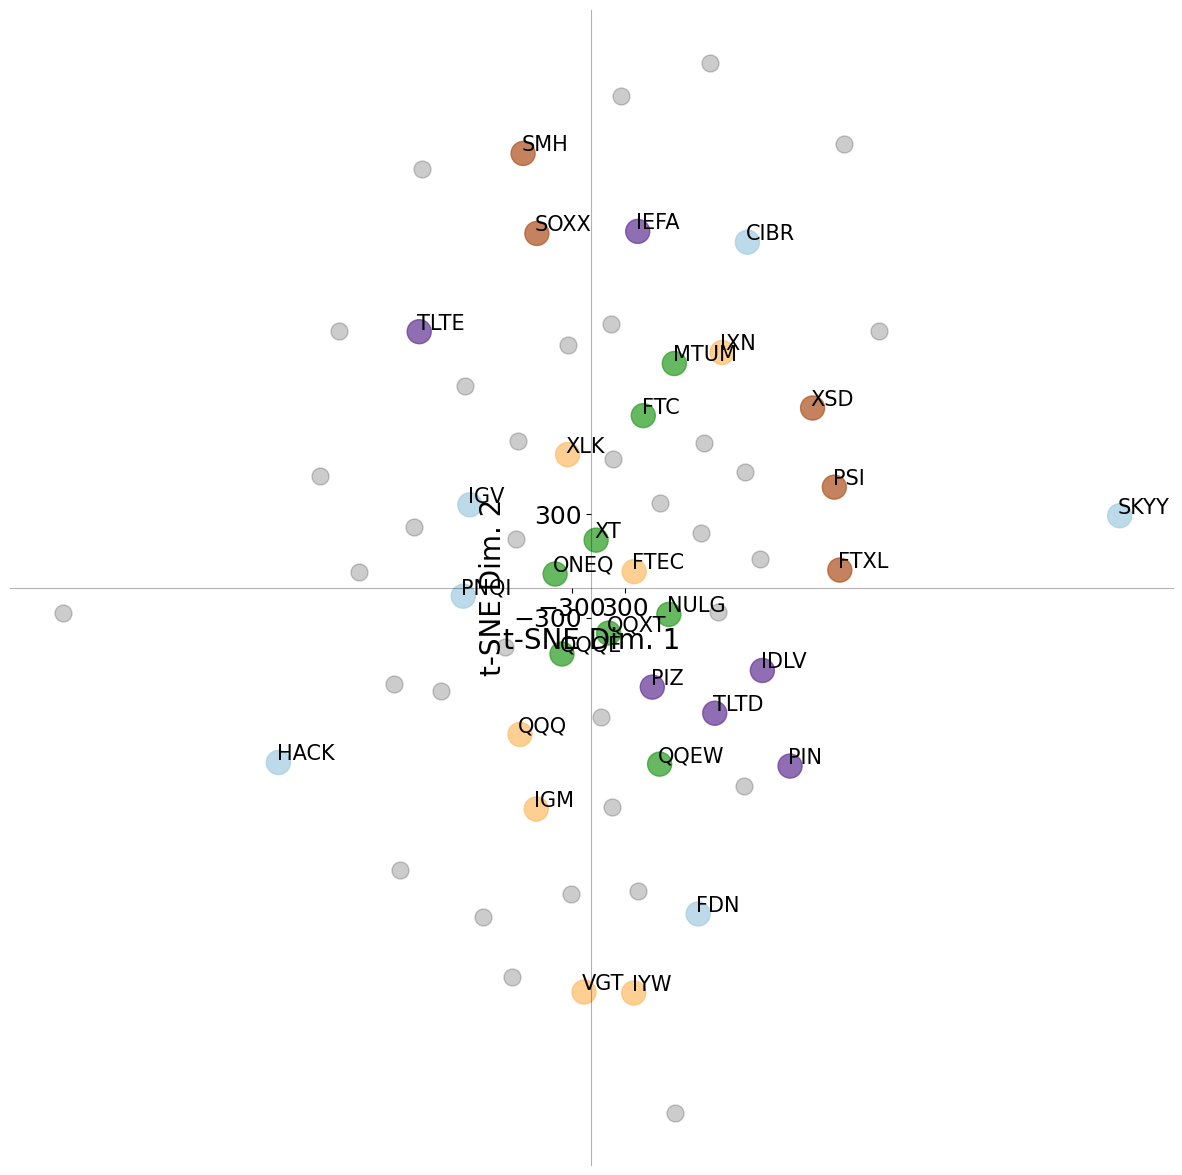

In [20]:
plot_TSNE(X,clf, clustered_series_all)

In [21]:
plt.rcParams.update({'font.size': 12})

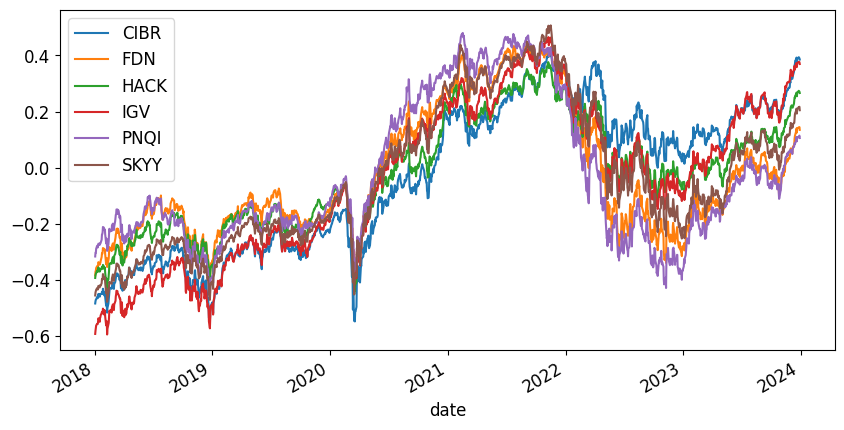

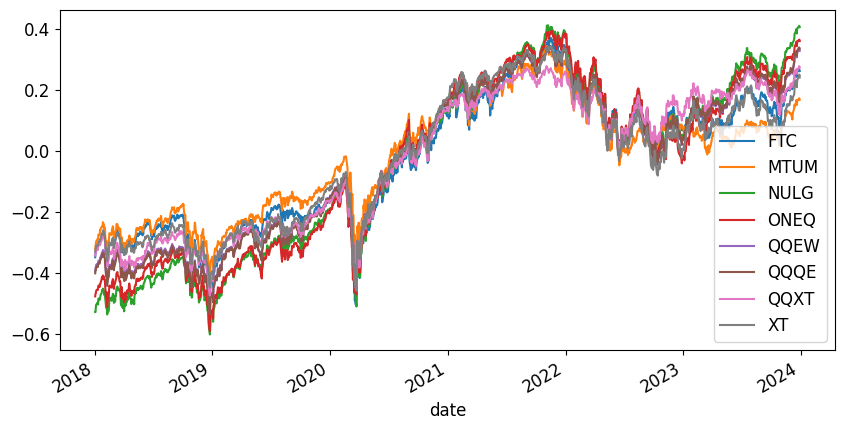

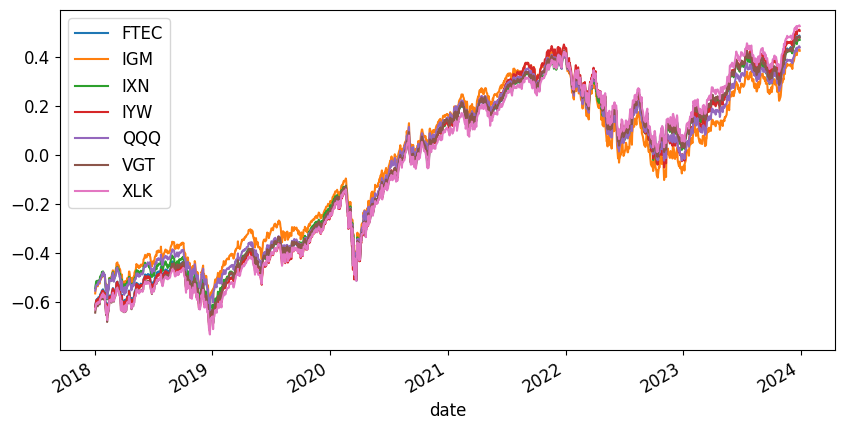

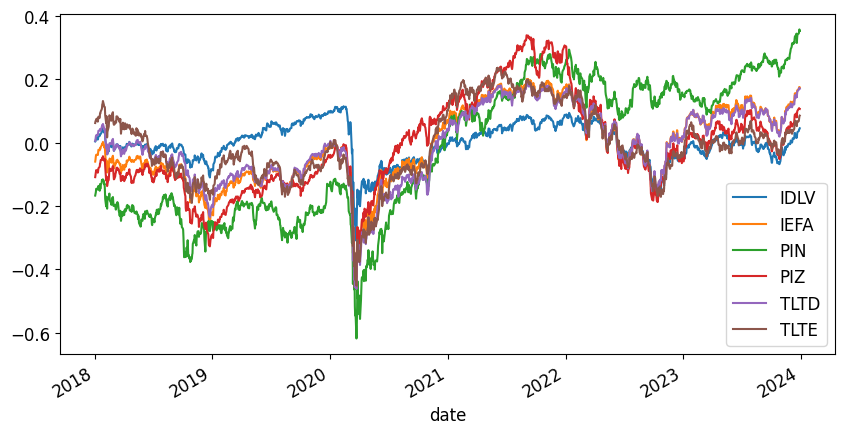

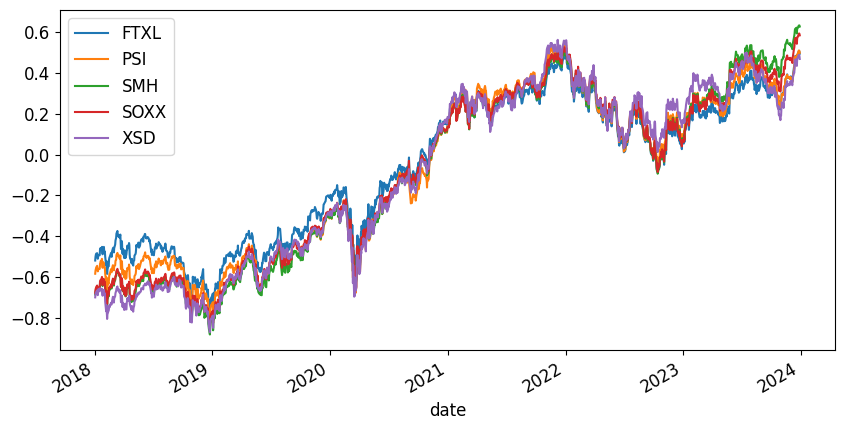

In [22]:
for clust in range(len(counts)):
    symbols = list(clustered_series[clustered_series==clust].index)
    means = np.log(df_prices_train[symbols].mean())
    series = np.log(df_prices_train[symbols]).sub(means)
    series.plot(figsize=(10,5))#title='ETFs Time Series for Cluster %d' % (clust+1))
    #plt.ylabel('Normalized log prices', size=12)
    #plt.xlabel('Date', size=12)
    plt.savefig('cluster_{}.png'.format(str(clust+1)), bbox_inches='tight', pad_inches=0.1)

In [23]:
subsample = 2500
min_half_life = 21 # avg. number of points in a month
max_half_life = 252 # avg. number of points in a year

In [24]:
clustered_series.to_csv(f'pca_cluster_Index_data.csv')
clustered_series

CIBR    0
FDN     0
FTC     1
FTEC    2
FTXL    4
HACK    0
IDLV    3
IEFA    3
IGM     2
IGV     0
IXN     2
IYW     2
MTUM    1
NULG    1
ONEQ    1
PIN     3
PIZ     3
PNQI    0
PSI     4
QQEW    1
QQQ     2
QQQE    1
QQXT    1
SKYY    0
SMH     4
SOXX    4
TLTD    3
TLTE    3
VGT     2
XLK     2
XSD     4
XT      1
dtype: int64

In [25]:
pairs_unsupervised, unique_tickers = series_analyser.get_candidate_pairs(clustered_series=clustered_series,
                                                            pricing_df_train=df_prices_train,
                                                            pricing_df_test=df_prices_test,
                                                            min_half_life=min_half_life,
                                                            max_half_life=max_half_life,
                                                            min_zero_crosings=12,
                                                            p_value_threshold=0.10,
                                                            hurst_threshold=0.5,
                                                            subsample=subsample
                                                            )

Cluster 5/5Found 15 pairs
The pairs contain 19 unique tickers
Pairs Selection failed stage:  {'cointegration': 72, 'None': 15, 'hurst_exponent': 2}


### Saving pairs

In [26]:
with open(f'PCA_selected_pairs.pickle', 'wb') as f:
    pickle.dump(pairs_unsupervised, f)

In [27]:
pairs_unsupervised

[('HACK',
  'IGV',
  {'t_statistic': -3.5199858438915004,
   'critical_val': {'1%': -3.434702484091523,
    '5%': -2.8634623461571733,
    '10%': -2.567793432853942},
   'p_value': 0.007488407878273013,
   'coint_coef': 0.5863558053991688,
   'zero_cross': 60,
   'half_life': 59,
   'hurst_exponent': 0.3978054091925201,
   'spread': date
   2018-01-02    13.026019
   2018-01-03    13.115511
   2018-01-04    13.117979
   2018-01-05    13.015690
   2018-01-08    13.192404
                   ...    
   2023-12-22    12.651341
   2023-12-26    12.857868
   2023-12-27    12.778152
   2023-12-28    12.724672
   2023-12-29    12.751729
   Length: 1509, dtype: float64,
   'Y_train': date
   2018-01-02    31.207857
   2018-01-03    31.518383
   2018-01-04    31.663942
   2018-01-05    31.751277
   2018-01-08    32.032691
                   ...    
   2023-12-22    60.438166
   2023-12-26    60.797146
   2023-12-27    60.681076
   2023-12-28    60.611178
   2023-12-29    60.321603
   Name: HACK,

## Clustering using PCA on all features

First we need to normalize the data before applying PCA.

In [28]:
# Vectorizing ETFs
etf_vectors = []
tickers = []
for ticker, df in index_dict.items():
    # Sort by date
    df_sorted = df.sort_index()
    # Fltenning all vectors
    vec = df_sorted.values.flatten()
    etf_vectors.append(vec)
    tickers.append(ticker)

In [29]:
# normalize
scaler = StandardScaler()
etf_vectors_scaled = scaler.fit_transform(etf_vectors)
etf_vectors_scaled.shape

(66, 42251)

We can now apply PCA

In [31]:
N_PRIN_COMPONENTS = 5
pca = PCA(n_components=N_PRIN_COMPONENTS, random_state=0)
X_pca = pca.fit_transform(etf_vectors_scaled)
print("explained variance :", pca.explained_variance_ratio_)

explained variance : [0.41542623 0.19262858 0.09169585 0.06260699 0.04367912]


In [32]:
# build a dataframe
X_pca_df = pd.DataFrame(X_pca, index=tickers, columns=[f'PC{i+1}' for i in range(N_PRIN_COMPONENTS)])
X_pca_df

,PC1,PC2,PC3,PC4,PC5
ARKK,-35.190202,-29.547457,17.923238,26.401809,-42.588860
ARKQ,-33.414941,-29.806554,0.395640,16.922120,-18.965951
ARKW,-27.189603,2.543030,13.104514,25.008612,-44.393800
CIBR,-32.807530,-41.737231,-14.250550,-24.681879,-10.856151
CQQQ,-23.062387,-68.790294,0.807069,106.710932,32.713392
...,...,...,...,...,...
XLK,6.918193,110.865099,6.791847,-22.300363,10.110844
XNTK,-1.713515,77.456945,-15.310723,11.562821,-17.439197
XSD,18.373850,146.201189,-24.531619,34.766109,-25.563299
XSW,6.036717,59.813877,-26.518839,3.033304,-17.930785


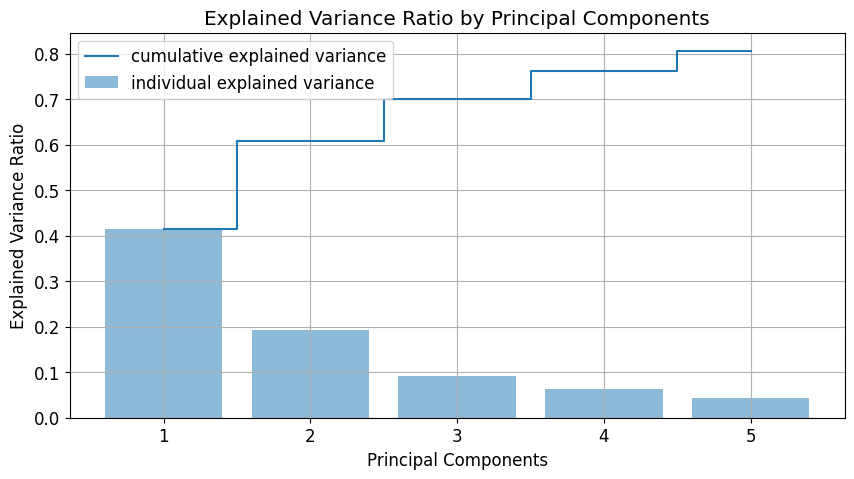

In [33]:
#plot explained variance bars
plt.figure(figsize=(10, 5))
plt.bar(range(1, N_PRIN_COMPONENTS+1), pca.explained_variance_ratio_, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, N_PRIN_COMPONENTS+1), np.cumsum(pca.explained_variance_ratio_), where='mid',
         label='cumulative explained variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.legend(loc='best')
plt.grid()
plt.savefig('explained_variance.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

cluster
-1    57
 0     9
Name: count, dtype: int64


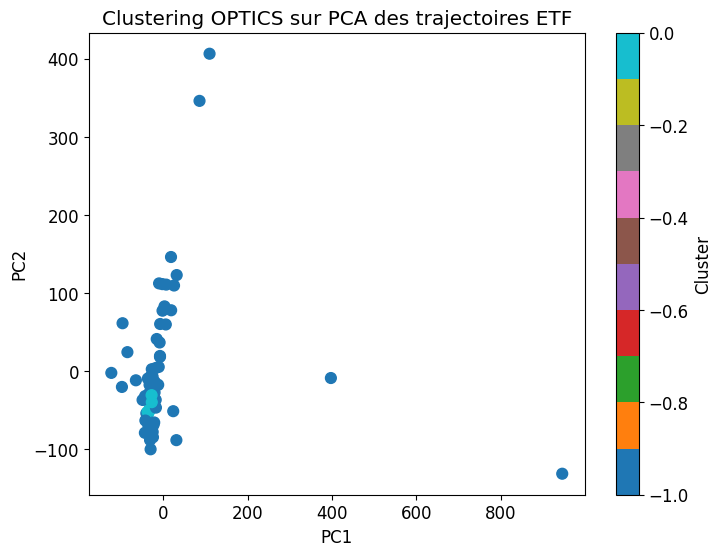

In [37]:
# OPTICS clustering on components
optics = OPTICS(min_samples=3, xi=0.05, min_cluster_size=0.1)
labels = optics.fit_predict(X_pca_df)

# labels au DataFrame
X_pca_df['cluster'] = labels

# printing number of ETFs par cluster
print(X_pca_df['cluster'].value_counts())

# quick view
plt.figure(figsize=(8,6))
plt.scatter(X_pca_df['PC1'], X_pca_df['PC2'], c=labels, cmap='tab10', s=60)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clustering OPTICS sur PCA des trajectoires ETF')
plt.colorbar(label='Cluster')
plt.show()

## Cluster analysis

In [ ]:
# find pairs of ETFs in the same cluster
pairs = []
